## Probabilidade e Estatística
# Tema : Ataques Globais de Lobo - Dupla: Thiago von Sohsten e Sérgio Gouveia

> Importando bibliotecas e o dataset



In [ ]:
import pandas as pd #importando as bibliotecas
import numpy as np

In [ ]:
from google.colab import drive #importando o drive

In [ ]:
drive.mount('/content/gdrive') #autorizando o acesso ao drive e chamando o google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import files #comando para importar arquivos no colab
uploaded = files.upload() #comando para fazer o upload do arquivo

Saving global_wolves.csv to global_wolves (1).csv


In [ ]:
wolf = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/global_wolves.csv')

In [ ]:
leitura = pd.read_csv('global_wolves.csv') #realiza a leitura do arquivo importado
leitura.head(10) #comando head serve para exibir as 5 primeiras linhas do dataframe

,Victims,Date,Type of attack,Location,Notes
0,"Martino Raineri, male","January 17, 2022",Unprovoked,"Between Malga Seconda Posta and Forte Cherle, ...","Seven wolves killed a man's dog, who was skiin..."
1,"Stanley Russ, 72, male","May 29, 2020",Unprovoked,"Port Edward, British Columbia, Canada",A wolf attacked a man and bit his legs and arm.
2,Vlastimil Vejrosta and his wife,"April 30, 2020",Predatory,"Božanov, Czech Republic",Three wolves attempted to surround a couple ne...
3,"Timur Makhametov, 23, male","December 30, 2019",Predatory,"Ketpen Village, Uighur District, Almaty Region...",A wolf attacked a young man who was getting wa...
4,"Unknown, adult, male","December 12, 2019",Rabid,"Tariat District, Arkhangai Province, Mongolia",A wolf bit a shepherd's hand outside his home.
5,"Vladislav Lomako, 56, male","December 8, 2019",Rabid,"Khotovo Village, Stowbtsy City, Stowbtsy Distr...",A wolf seriously injured a man at a bus stop n...
6,"Zinaida Kozlovskaya, adult, female","November 22, 2019",Rabid,"Syanno, Senno District, Vitebsk Region, Belarus",A wolf bit a woman in the evening.
7,"Petr Grishchenko and Sergei Budnik, adult males","October 24, 2019",Unknown,"Ruchaevka Village, Loevsky District, Gomel Reg...","A wolf attacked a man on his porch, then later..."
8,"Four adults, three males and a female","October 7, 2019",Unknown,"Kayasula Village, Neftekumsky District, Stavro...","A series of attacks over two days, in which fo..."
9,"Three adult residents, two males and a female","September 14, 2019",Rabid,"Perevalnoye and Privolnoye Villages, Simferopo...",A wolf attacked a dog and its owner in a priva...


Extração de Palavras-Chave da Coluna "Notes"

In [ ]:
# Importando bibliotecas necessárias
from sklearn.feature_extraction.text import CountVectorizer

# Extraindo as palavras mais frequentes da coluna "Notes"
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(wolf['Notes'].dropna())  # Removendo valores nulos
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Exibindo as palavras mais frequentes
word_counts.sum().sort_values(ascending=False)


,0
wolf,320
injured,131
wolves,127
killed,121
attacked,120
boy,70
man,67
ate,62
girl,61
woman,49


**Probabilidade Simples**

Qual a probabilidade de um lobo atacar um ser humano de forma predatória? Ataques em que o lobo vê a vítima como uma presa, atacando com a intenção de capturar e se alimentar da vítima.



In [ ]:
# Contagem total de ataques
total_attacks = wolf.shape[0]

# 1. Probabilidade de um ataque ser predatório
predatory_attacks = wolf[wolf['Type of attack'] == 'Predatory'].shape[0]
prob_predatory = predatory_attacks / total_attacks

print(f"Probabilidade de um ataque ser predatório: {prob_predatory:.2%}")



Probabilidade de um ataque ser predatório: 67.75%


 Qual a probabilidade de um ataque ser rabioso? Esses ataques são causados por lobos infectados com raiva, uma doença viral que afeta o sistema nervoso e faz com que o animal se torne extremamente agressivo e perigoso. Lobos com raiva atacam indiscriminadamente e de forma violenta.

In [ ]:
# 2. Probabilidade de um ataque ser rabioso
rabid_attacks = wolf[wolf['Type of attack'] == 'Rabid'].shape[0]
prob_rabid = rabid_attacks / total_attacks
print(f"Probabilidade de um ataque ser rabioso: {prob_rabid:.2%}")

Probabilidade de um ataque ser rabioso: 12.99%


 Qual a probabilidade de um ataque seja Não provocado? Ataques que ocorrem sem qualquer ação por parte da vítima que pudesse ter desencadeado a agressão. Isso significa que o lobo atacou sem ser provocado ou ameaçado de alguma forma.

In [ ]:
# 3. Probabilidade de um ataque ser não provocado
unprovoked_attacks = wolf[wolf['Type of attack'] == 'Unprovoked'].shape[0]
prob_unprovoked = unprovoked_attacks / total_attacks
print(f"Probabilidade de um ataque ser não provocado: {prob_unprovoked:.2%}")

Probabilidade de um ataque ser não provocado: 10.61%


Qual a probabilidade de um ataque ocorrer na América do Norte?

In [ ]:

# 4. Probabilidade de um ataque ocorrer na América do Norte
north_america_attacks = wolf[wolf['Location'].str.contains('Canada|United States|Mexico', na=False)].shape[0]
prob_north_america = north_america_attacks / total_attacks
print(f"Probabilidade de um ataque ocorrer na América do Norte: {prob_north_america:.2%}")

Probabilidade de um ataque ocorrer na América do Norte: 4.11%


Qual a probabilidade de uma vítima ser do sexo masculino?

In [ ]:
# 5. Probabilidade de uma vítima ser do sexo masculino
male_victims = wolf[wolf['Victims'].str.contains('male', na=False)].shape[0]
prob_male_victims = male_victims / total_attacks

print(f"Probabilidade de uma vítima ser do sexo masculino: {prob_male_victims:.2%}")

Probabilidade de uma vítima ser do sexo masculino: 73.59%


Qual a probabilidade de um ataque ocorrer em uma data recente?

In [ ]:
# 6. Probabilidade de um ataque ocorrer em uma data recente (por exemplo, após 2015)
recent_attacks = wolf[wolf['Date'].str.contains('2015|2016|2017|2018|2019|2020|2021|2022', na=False)].shape[0]
prob_recent_attacks = recent_attacks / total_attacks
print(f"Probabilidade de um ataque ocorrer após 2015: {prob_recent_attacks:.2%}")

Probabilidade de um ataque ocorrer após 2015: 27.06%


Qual a probabilidade de um ataque ser documentado como "Unknown" (desconhecido)?

In [ ]:
# 7. Probabilidade de um ataque ser documentado como "Unknown" (desconhecido)
unknown_attacks = wolf[wolf['Type of attack'] == 'Unknown'].shape[0]
prob_unknown_attacks = unknown_attacks / total_attacks
print(f"Probabilidade de um ataque ser documentado como 'Unknown': {prob_unknown_attacks:.2%}")

Probabilidade de um ataque ser documentado como 'Unknown': 1.52%


Qual a probabilidade de um ataque envolver múltiplas vítimas


In [ ]:
# 8. Probabilidade de um ataque envolver múltiplas vítimas
multiple_victims_attacks = wolf[wolf['Victims'].str.contains('and', na=False)].shape[0]
prob_multiple_victims = multiple_victims_attacks / total_attacks

print(f"Probabilidade de um ataque envolver múltiplas vítimas: {prob_multiple_victims:.2%}")

Probabilidade de um ataque envolver múltiplas vítimas: 5.41%


Qual a probabilidade dos ataques serem descritos como "violentos"?

---



In [ ]:
# Contagem total de ataques com "Notes" válidas
total_attacks_notes = wolf['Notes'].dropna().shape[0]


violent_attacks = wolf[wolf['Notes'].str.contains('violent', na=False)].shape[0]
prob_violent = violent_attacks / total_attacks_notes


# Exibindo as probabilidades simples
print(f"Probabilidade de um ataque ser descrito como 'violento': {prob_violent:.2%}")



Probabilidade de um ataque ser descrito como 'violento': 0.00%


Qual a probabilidade de um ataque ser fatal?

In [ ]:
#9
fatal_attacks = wolf[wolf['Notes'].str.contains('fatal', na=False)].shape[0]
prob_fatal = fatal_attacks / total_attacks_notes
print(f"Probabilidade de um ataque ser descrito como 'fatal': {prob_fatal:.2%}")

Probabilidade de um ataque ser descrito como 'fatal': 10.57%


Qual a probabilidade de ter um cachorro envolvido no ataque?

In [ ]:
#10
dog_mentions = wolf[wolf['Notes'].str.contains('dog', na=False)].shape[0]
prob_dog = dog_mentions / total_attacks_notes
print(f"Probabilidade de um cachorro esteja envolvido no relato do ataque: {prob_dog:.2%}")

Probabilidade de um cachorro esteja envolvido no relato do ataque: 7.22%


Qual a probabilidade da vítima sair ilesa(não se machucar)?

In [ ]:
#11
# Contagem total de ataques
total_attacks = wolf.shape[0]

# Contagem de ataques onde a vítima não se machucou ("unharmed", "no injury")
unharmed_attacks = wolf[wolf['Notes'].str.contains('unharmed|no injury', case=False, na=False)].shape[0]

# Probabilidade simples de a vítima sofrer o ataque e não se machucar
prob_unharmed = unharmed_attacks / total_attacks

# Exibindo o resultado
print(f"Probabilidade de a vítima não se machucar: {prob_unharmed:.2%}")


Probabilidade de a vítima não se machucar: 0.00%


Qual a probabilidade da vítima se ferir gravemente?

In [ ]:
#12
# Contagem total de ataques
total_attacks = wolf.shape[0]

# Contagem de ataques onde a vítima foi gravemente ferida ("seriously injured", "severely injured")
severe_injury_attacks = wolf[wolf['Notes'].str.contains('seriously injured|severely injured|critical condition', case=False, na=False)].shape[0]

# Probabilidade simples de a vítima se machucar gravemente
prob_severe_injury = severe_injury_attacks / total_attacks

# Exibindo o resultado
print(f"Probabilidade de a vítima se machucar gravemente: {prob_severe_injury:.2%}")


Probabilidade de a vítima se machucar gravemente: 7.79%


**Probabilidade da União**

Qual a probabilidade de um ataque ser predatório ou rabioso?

In [ ]:
# 1. Probabilidade de um ataque ser predatório ou rabioso
prob_predatory_or_rabid = prob_predatory + prob_rabid - (prob_predatory * prob_rabid)
print(f"Probabilidade de um ataque ser predatório ou rabioso: {prob_predatory_or_rabid:.2%}")

Probabilidade de um ataque ser predatório ou rabioso: 71.94%


 Qual a probabilidade de um ataque ser não provocado ou ocorrer na América do Norte?

In [ ]:
# 2. Probabilidade de um ataque ser não provocado ou ocorrer na América do Norte
prob_unprovoked_or_north_america = prob_unprovoked + prob_north_america - (prob_unprovoked * prob_north_america)
print(f"Probabilidade de um ataque ser não provocado ou ocorrer na América do Norte: {prob_unprovoked_or_north_america:.2%}")



Probabilidade de um ataque ser não provocado ou ocorrer na América do Norte: 14.28%


Qual a probabilidade de um ataque ser predatório ou envolver múltiplas vítimas?

In [ ]:
# 3. Probabilidade de um ataque ser predatório ou envolver múltiplas vítimas
prob_predatory_or_multiple_victims = prob_predatory + prob_multiple_victims - (prob_predatory * prob_multiple_victims)
print(f"Probabilidade de um ataque ser predatório ou envolver múltiplas vítimas: {prob_predatory_or_multiple_victims:.2%}")


Probabilidade de um ataque ser predatório ou envolver múltiplas vítimas: 69.49%


Qual a probabilidade de um ataque ocorrer na América do Norte ou ser documentado como "Unknown"?

In [ ]:
# 4. Probabilidade de um ataque ocorrer na América do Norte ou ser documentado como "Unknown"
prob_north_america_or_unknown = prob_north_america + prob_unknown_attacks - (prob_north_america * prob_unknown_attacks)

print(f"Probabilidade de um ataque ocorrer na América do Norte ou ser documentado como 'Unknown': {prob_north_america_or_unknown:.2%}")

Probabilidade de um ataque ocorrer na América do Norte ou ser documentado como 'Unknown': 5.57%


Qual a probabilidade de um ataque ser rabioso ou ocorrer após 2015?

In [ ]:
# 5. Probabilidade de um ataque ser rabioso ou ocorrer após 2015
prob_rabid_or_recent = prob_rabid + prob_recent_attacks - (prob_rabid * prob_recent_attacks)
print(f"Probabilidade de um ataque ser rabioso ou ocorrer após 2015: {prob_rabid_or_recent:.2%}")

Probabilidade de um ataque ser rabioso ou ocorrer após 2015: 36.53%


Qual a probabilidade de um ataque ser violento ou fatal?

In [ ]:
# 1. Probabilidade de um ataque ser descrito como "violento" ou "fatal"
prob_violent_or_fatal = prob_violent + prob_fatal - (prob_violent * prob_fatal)



# Exibindo as probabilidades de união
print(f"Probabilidade de um ataque ser 'violento' ou 'fatal': {prob_violent_or_fatal:.2%}")



Probabilidade de um ataque ser 'violento' ou 'fatal': 10.57%


**Probabilidade da Intersecção**

Qual a probabilidade de um ataque ser predatório e fatal?

In [ ]:
# Probabilidade de um ataque ser predatório
predatory_attacks = wolf[wolf['Type of attack'] == 'Predatory'].shape[0]
prob_predatory = predatory_attacks / total_attacks

# Probabilidade de um ataque ser descrito como fatal
fatal_attacks = wolf[wolf['Notes'].str.contains('fatal', na=False)].shape[0]
prob_fatal = fatal_attacks / total_attacks

# Probabilidade de um ataque ser predatório e fatal (interseção)
predatory_fatal_attacks = wolf[(wolf['Type of attack'] == 'Predatory') & (wolf['Notes'].str.contains('fatal', na=False))].shape[0]
prob_predatory_and_fatal = predatory_fatal_attacks / total_attacks

# Exibindo o resultado
print(f"Probabilidade de um ataque ser predatório e fatal: {prob_predatory_and_fatal:.2%}")


Probabilidade de um ataque ser predatório e fatal: 5.84%


Qual a probabilidade de um ataque ser predatório e ocorrer no Canadá?

In [ ]:
# 1. Probabilidade de um ataque ser predatório e ocorrer no Canadá
attacks_predatory_canada = wolf[wolf['Type of attack'] == 'Predatory'][wolf['Location'].str.contains('Canada', na=False)].shape[0]
prob_predatory_and_canada = attacks_predatory_canada / total_attacks
print(f"Probabilidade de um ataque ser predatório e ocorrer no Canadá: {prob_predatory_and_canada:.2%}")

Probabilidade de um ataque ser predatório e ocorrer no Canadá: 2.38%


<ipython-input-32-75db93f31833>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  attacks_predatory_canada = wolf[wolf['Type of attack'] == 'Predatory'][wolf['Location'].str.contains('Canada', na=False)].shape[0]


Qual a probabilidade de um ataque ser rabioso e ocorrer na Europa?

In [ ]:
# 2. Probabilidade de um ataque ser rabioso e ocorrer na Europa
attacks_rabid_europe = wolf[wolf['Type of attack'] == 'Rabid'][wolf['Location'].str.contains('France|Germany|Spain|Italy|Czech Republic|Poland|Russia|Finland|Norway|Sweden', na=False)].shape[0]
prob_rabid_and_europe = attacks_rabid_europe / total_attacks

print(f"Probabilidade de um ataque ser rabioso e ocorrer na Europa: {prob_rabid_and_europe:.2%}")



Probabilidade de um ataque ser rabioso e ocorrer na Europa: 3.90%


<ipython-input-33-3bdb70052166>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  attacks_rabid_europe = wolf[wolf['Type of attack'] == 'Rabid'][wolf['Location'].str.contains('France|Germany|Spain|Italy|Czech Republic|Poland|Russia|Finland|Norway|Sweden', na=False)].shape[0]


Qual a probabilidade de um ataque ser não provocado e ocorrer no Canadá?

In [ ]:
# prompt: 3

# 3. Probabilidade de um ataque ser não provocado e ocorrer no Canadá
attacks_unprovoked_canada = wolf[wolf['Type of attack'] == 'Unprovoked'][wolf['Location'].str.contains('Canada', na=False)].shape[0]
prob_unprovoked_and_canada = attacks_unprovoked_canada / total_attacks

print(f"Probabilidade de um ataque ser não provocado e ocorrer no Canadá: {prob_unprovoked_and_canada:.2%}")


Probabilidade de um ataque ser não provocado e ocorrer no Canadá: 1.08%


<ipython-input-34-e3ff581a3833>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  attacks_unprovoked_canada = wolf[wolf['Type of attack'] == 'Unprovoked'][wolf['Location'].str.contains('Canada', na=False)].shape[0]


Qual a probabilidade de um ataque ser predatório e envolver múltiplas vítimas?

In [ ]:
# prompt: 4

# 4. Probabilidade de um ataque ser predatório e envolver múltiplas vítimas
attacks_predatory_multiple_victims = wolf[(wolf['Type of attack'] == 'Predatory') & (wolf['Victims'].str.contains('and', na=False))].shape[0]
prob_predatory_and_multiple_victims = attacks_predatory_multiple_victims / total_attacks

print(f"Probabilidade de um ataque ser predatório e envolver múltiplas vítimas: {prob_predatory_and_multiple_victims:.2%}")


Probabilidade de um ataque ser predatório e envolver múltiplas vítimas: 2.16%


Qual a probabilidade de um ataque ocorrer após 2015 e ser não provocado?

In [ ]:
# prompt: 5

# 5. Probabilidade de um ataque ocorrer após 2015 e ser não provocado
attacks_recent_unprovoked = wolf[(wolf['Date'].str.contains('2015|2016|2017|2018|2019|2020|2021|2022', na=False)) & (wolf['Type of attack'] == 'Unprovoked')].shape[0]
prob_recent_and_unprovoked = attacks_recent_unprovoked / total_attacks

print(f"Probabilidade de um ataque ocorrer após 2015 e ser não provocado: {prob_recent_and_unprovoked:.2%}")


Probabilidade de um ataque ocorrer após 2015 e ser não provocado: 8.01%


**Probabilidade do Complemento**

Qual a probabilidade de um ataque não ser predatório?

In [ ]:
# 1. Probabilidade de um ataque não ser predatório
prob_not_predatory = 1 - prob_predatory

print(f"Probabilidade de um ataque não ser predatório: {prob_not_predatory:.2%}")


Probabilidade de um ataque não ser predatório: 32.25%


Qual a probabilidade de um ataque não ser rabioso?

In [ ]:
# 2. Probabilidade de um ataque não ser rabioso
prob_not_rabid = 1 - prob_rabid

print(f"Probabilidade de um ataque não ser rabioso: {prob_not_rabid:.2%}")


Probabilidade de um ataque não ser rabioso: 87.01%


Qual a probabilidade de um ataque não ocorrer no Canadá?

In [ ]:
# 3. Probabilidade de um ataque não ocorrer no Canadá
prob_canada = wolf[wolf['Location'].str.contains('Canada', na=False)].shape[0] / total_attacks
prob_not_canada = 1 - prob_canada

print(f"Probabilidade de um ataque não ocorrer no Canadá: {prob_not_canada:.2%}")


Probabilidade de um ataque não ocorrer no Canadá: 95.89%


Qual a probabilidade de um ataque não envolver múltiplas vítimas?

In [ ]:
# 4. Probabilidade de um ataque não envolver múltiplas vítimas
prob_not_multiple_victims = 1 - prob_multiple_victims

print(f"Probabilidade de um ataque não envolver múltiplas vítimas: {prob_not_multiple_victims:.2%}")


Probabilidade de um ataque não envolver múltiplas vítimas: 94.59%


Qual a probabilidade de um ataque não ocorrer após 2015?

In [ ]:
# 5. Probabilidade de um ataque não ocorrer após 2015
prob_not_recent = 1 - prob_recent_attacks

print(f"Probabilidade de um ataque não ocorrer após 2015: {prob_not_recent:.2%}")


Probabilidade de um ataque não ocorrer após 2015: 72.94%


**Probabilidade da Diferença**

Qual a probabilidade de um ataque ser predatório, mas não ocorrer no Canadá?

In [ ]:
# 1. Probabilidade de um ataque ser predatório, mas não ocorrer no Canadá
prob_predatory_not_canada = prob_predatory - prob_predatory_and_canada

print(f"Probabilidade de um ataque ser predatório, mas não ocorrer no Canadá: {prob_predatory_not_canada:.2%}")


Probabilidade de um ataque ser predatório, mas não ocorrer no Canadá: 65.37%


Qual a probabilidade de um ataque ser rabioso, mas não ocorrer na Europa?

In [ ]:
# 2. Probabilidade de um ataque ser rabioso, mas não ocorrer na Europa
prob_rabid_not_europe = prob_rabid - prob_rabid_and_europe

print(f"Probabilidade de um ataque ser rabioso, mas não ocorrer na Europa: {prob_rabid_not_europe:.2%}")


Probabilidade de um ataque ser rabioso, mas não ocorrer na Europa: 9.09%


Qual a probabilidade de um ataque ser não provocado, mas não ocorrer nos EUA ?

In [ ]:
# Primeiro, certifique-se de que você tenha calculado as probabilidades de interesse antes de calcular a diferença

# Probabilidade de um ataque ser não provocado
prob_unprovoked = wolf[wolf['Type of attack'] == 'Unprovoked'].shape[0] / total_attacks

# Probabilidade de um ataque ser não provocado e ocorrer nos EUA
prob_unprovoked_and_usa = wolf[(wolf['Type of attack'] == 'Unprovoked') & (wolf['Location'].str.contains('United States', na=False))].shape[0] / total_attacks

# Probabilidade de um ataque ser não provocado e não ocorrer nos EUA
prob_unprovoked_not_usa = prob_unprovoked - prob_unprovoked_and_usa

# Exibindo o resultado
print(f"Probabilidade de um ataque ser não provocado, mas não ocorrer nos EUA: {prob_unprovoked_not_usa:.2%}")


Probabilidade de um ataque ser não provocado, mas não ocorrer nos EUA: 10.61%


Qual a probabilidade de um ataque envolver múltiplas vítimas, mas não ser predatório?

In [ ]:
# Certifique-se de que você tenha calculado as probabilidades de múltiplas vítimas e predatório

# Probabilidade de um ataque envolver múltiplas vítimas
prob_multiple_victims = wolf[wolf['Victims'].str.contains('and', na=False)].shape[0] / total_attacks

# Probabilidade de um ataque ser predatório e envolver múltiplas vítimas
prob_predatory_and_multiple = wolf[(wolf['Type of attack'] == 'Predatory') & (wolf['Victims'].str.contains('and', na=False))].shape[0] / total_attacks

# Probabilidade de um ataque envolver múltiplas vítimas, mas não ser predatório
prob_multiple_not_predatory = prob_multiple_victims - prob_predatory_and_multiple

# Exibindo o resultado
print(f"Probabilidade de um ataque envolver múltiplas vítimas, mas não ser predatório: {prob_multiple_not_predatory:.2%}")


Probabilidade de um ataque envolver múltiplas vítimas, mas não ser predatório: 3.25%


In [ ]:
# 5. Probabilidade de um ataque ocorrer após 2015, mas não ser não provocado
prob_recent_not_unprovoked = prob_recent_attacks - prob_recent_and_unprovoked

print(f"Probabilidade de um ataque ocorrer após 2015, mas não ser não provocado: {prob_recent_not_unprovoked:.2%}")


Probabilidade de um ataque ocorrer após 2015, mas não ser não provocado: 19.05%


**Probabilidade** **Condicional**

 Qual a probabilidade de um ataque ser predatório dado que ocorreu em uma área rural?

In [ ]:
# prompt: 1

# 1. Probabilidade de um ataque ser predatório dado que ocorreu em uma área rural
# Filtrando os ataques que ocorreram em áreas rurais
rural_attacks = wolf[wolf['Location'].str.contains('rural', na=False)]

# Total de ataques em áreas rurais
total_rural_attacks = rural_attacks.shape[0]

# Ataques predatórios em áreas rurais
predatory_rural_attacks = rural_attacks[rural_attacks['Type of attack'] == 'Predatory'].shape[0]

# Probabilidade condicional
prob_predatory_given_rural = predatory_rural_attacks / total_rural_attacks

print(f"Probabilidade de um ataque ser predatório dado que ocorreu em uma área rural: {prob_predatory_given_rural:.2%}")


Probabilidade de um ataque ser predatório dado que ocorreu em uma área rural: 100.00%


Qual a probabilidade de a vítima se machucar gravemente dado que o ataque foi rabioso?

In [ ]:
# prompt: 2

# 2. Probabilidade de a vítima se machucar gravemente dado que o ataque foi rabioso
# Filtrando os ataques rabisos
rabid_attacks = wolf[wolf['Type of attack'] == 'Rabid']

# Total de ataques rabisos
total_rabid_attacks = rabid_attacks.shape[0]

# Ataques rabisos com vítimas gravemente feridas
severe_injury_rabid_attacks = rabid_attacks[rabid_attacks['Notes'].str.contains('seriously injured|severely injured|critical condition', case=False, na=False)].shape[0]

# Probabilidade condicional
prob_severe_injury_given_rabid = severe_injury_rabid_attacks / total_rabid_attacks

print(f"Probabilidade de a vítima se machucar gravemente dado que o ataque foi rabioso: {prob_severe_injury_given_rabid:.2%}")


Probabilidade de a vítima se machucar gravemente dado que o ataque foi rabioso: 16.67%


Qual a probabilidade de o ataque ser fatal dado que ele foi predatório?

In [ ]:
# prompt: 3

# 3. Probabilidade de o ataque ser fatal dado que ele foi predatório
# Filtrando os ataques predatórios
predatory_attacks = wolf[wolf['Type of attack'] == 'Predatory']

# Total de ataques predatórios
total_predatory_attacks = predatory_attacks.shape[0]

# Ataques predatórios fatais
fatal_predatory_attacks = predatory_attacks[predatory_attacks['Notes'].str.contains('fatal', na=False)].shape[0]

# Probabilidade condicional
prob_fatal_given_predatory = fatal_predatory_attacks / total_predatory_attacks

print(f"Probabilidade de o ataque ser fatal dado que ele foi predatório: {prob_fatal_given_predatory:.2%}")


Probabilidade de o ataque ser fatal dado que ele foi predatório: 8.63%


Qual a Probabilidade de um ataque ser não provocado dado que a vítima estava correndo?

In [ ]:
# prompt: 4

# 4. Probabilidade de um ataque ser não provocado dado que a vítima estava correndo
# Filtrando os ataques onde a vítima estava correndo
running_victims = wolf[wolf['Notes'].str.contains('running', na=False)]

# Total de ataques onde a vítima estava correndo
total_running_victims = running_victims.shape[0]

# Ataques não provocados onde a vítima estava correndo
unprovoked_running_victims = running_victims[running_victims['Type of attack'] == 'Unprovoked'].shape[0]

# Probabilidade condicional
prob_unprovoked_given_running = unprovoked_running_victims / total_running_victims

print(f"Probabilidade de um ataque ser não provocado dado que a vítima estava correndo: {prob_unprovoked_given_running:.2%}")


Probabilidade de um ataque ser não provocado dado que a vítima estava correndo: 0.00%


Qual a Probabilidade de a vítima não se machucar dado que o ataque foi em grupo de lobos?

In [ ]:
# prompt: 5

# 5. Probabilidade de a vítima não se machucar dado que o ataque foi em grupo de lobos
# Filtrando os ataques em grupo de lobos
group_attacks = wolf[wolf['Notes'].str.contains('pack|group', na=False)]

# Total de ataques em grupo de lobos
total_group_attacks = group_attacks.shape[0]

# Ataques em grupo de lobos onde a vítima não se machucou
unharmed_group_attacks = group_attacks[group_attacks['Notes'].str.contains('unharmed|no injury', case=False, na=False)].shape[0]

# Probabilidade condicional
prob_unharmed_given_group = unharmed_group_attacks / total_group_attacks

print(f"Probabilidade de a vítima não se machucar dado que o ataque foi em grupo de lobos: {prob_unharmed_given_group:.2%}")


Probabilidade de a vítima não se machucar dado que o ataque foi em grupo de lobos: 0.00%


Qual a Probabilidade de um ataque ser fatal dado que ocorreu no inverno?


In [ ]:
# prompt: 6

# 6. Probabilidade de um ataque ser fatal dado que ocorreu no inverno
# Filtrando os ataques que ocorreram no inverno
winter_attacks = wolf[wolf['Date'].str.contains('December|January|February', na=False)]

# Total de ataques no inverno
total_winter_attacks = winter_attacks.shape[0]

# Ataques fatais no inverno
fatal_winter_attacks = winter_attacks[winter_attacks['Notes'].str.contains('fatal', na=False)].shape[0]

# Probabilidade condicional
prob_fatal_given_winter = fatal_winter_attacks / total_winter_attacks

print(f"Probabilidade de um ataque ser fatal dado que ocorreu no inverno: {prob_fatal_given_winter:.2%}")


Probabilidade de um ataque ser fatal dado que ocorreu no inverno: 9.57%


 Qual a probabilidade de a vítima se machucar gravemente dado que o ataque foi descrito como não provocado?

In [ ]:
# prompt: 7

# Filtrando os ataques não provocados
unprovoked_attacks = wolf[wolf['Type of attack'] == 'Unprovoked']

# Total de ataques não provocados
total_unprovoked_attacks = unprovoked_attacks.shape[0]

# Ataques não provocados com vítimas gravemente feridas
severe_injury_unprovoked_attacks = unprovoked_attacks[unprovoked_attacks['Notes'].str.contains('seriously injured|severely injured|critical condition', case=False, na=False)].shape[0]

# Probabilidade condicional
prob_severe_injury_given_unprovoked = severe_injury_unprovoked_attacks / total_unprovoked_attacks

print(f"Probabilidade de a vítima se machucar gravemente dado que o ataque foi não provocado: {prob_severe_injury_given_unprovoked:.2%}")


Probabilidade de a vítima se machucar gravemente dado que o ataque foi não provocado: 16.33%


 Qual a probabilidade de um ataque ser rabioso dado que ocorreu após 2015?

In [ ]:
# prompt: 8

# Contagem total de ataques
total_attacks = wolf.shape[0]

# Contagem de ataques onde o tipo de ataque é "Rabid"
rabid_attacks = wolf[wolf['Type of attack'] == 'Rabid'].shape[0]

# Probabilidade simples de um ataque ser rabioso
prob_rabid = rabid_attacks / total_attacks

# Contagem de ataques após 2015
recent_attacks = wolf[wolf['Date'].str.contains('2015|2016|2017|2018|2019|2020|2021|2022', na=False)].shape[0]
prob_recent_attacks = recent_attacks / total_attacks

# Contagem de ataques rabisos após 2015
rabid_recent_attacks = wolf[(wolf['Type of attack'] == 'Rabid') & (wolf['Date'].str.contains('2015|2016|2017|2018|2019|2020|2021|2022', na=False))].shape[0]
prob_rabid_and_recent = rabid_recent_attacks / total_attacks

# Probabilidade condicional de um ataque ser rabioso dado que ocorreu após 2015
prob_rabid_given_recent = prob_rabid_and_recent / prob_recent_attacks

# Exibindo o resultado
print(f"Probabilidade de um ataque ser rabioso dado que ocorreu após 2015: {prob_rabid_given_recent:.2%}")


Probabilidade de um ataque ser rabioso dado que ocorreu após 2015: 21.60%


**Teorema  de Bayes**

Qual a probabilidade de um ataque ser fatal tal que seja predatório?


In [ ]:
#1 Probabilidade de o ataque ser fatal
fatal_attacks = wolf[wolf['Notes'].str.contains('fatal', na=False)].shape[0]
prob_fatal = fatal_attacks / total_attacks

# Probabilidade de o ataque ser predatório
predatory_attacks = wolf[wolf['Type of attack'] == 'Predatory'].shape[0]
prob_predatory = predatory_attacks / total_attacks

# Probabilidade de um ataque ser predatório dado que foi fatal
predatory_fatal_attacks = wolf[(wolf['Type of attack'] == 'Predatory') & (wolf['Notes'].str.contains('fatal', na=False))].shape[0]
prob_predatory_given_fatal = predatory_fatal_attacks / fatal_attacks

# Aplicando o Teorema de Bayes
prob_fatal_given_predatory = (prob_predatory_given_fatal * prob_fatal) / prob_predatory

# Exibindo o resultado
print(f"Probabilidade de o ataque ser fatal dado que foi predatório: {prob_fatal_given_predatory:.2%}")


Probabilidade de o ataque ser fatal dado que foi predatório: 8.63%


Qual a probabilidade de um ataque ser predatório tal que tenha ocorrido no inverno?

In [ ]:
#2 Probabilidade de um ataque ser predatório
predatory_attacks = wolf[wolf['Type of attack'] == 'Predatory'].shape[0]
prob_predatory = predatory_attacks / total_attacks

# Probabilidade de um ataque ter ocorrido no inverno
winter_attacks = wolf[wolf['Date'].str.contains('12|01|02', na=False)].shape[0]
prob_winter_attacks = winter_attacks / total_attacks

# Probabilidade de um ataque ser predatório dado que ocorreu no inverno
predatory_winter_attacks = wolf[(wolf['Type of attack'] == 'Predatory') & (wolf['Date'].str.contains('12|01|02', na=False))].shape[0]
prob_predatory_given_winter = predatory_winter_attacks / winter_attacks

# Teorema de Bayes: P(Predatory | Winter)
prob_winter_given_predatory = (prob_predatory_given_winter * prob_predatory) / prob_winter_attacks

print(f"Probabilidade de um ataque ser predatório tal que tenha ocorrido no inverno: {prob_winter_given_predatory:.2%}")


Probabilidade de um ataque ser predatório tal que tenha ocorrido no inverno: 73.76%


Qual a probabilidade de um ataque envolver múltiplas vítimas tal que tenha ocorrido após 2015?

In [ ]:
#3 Probabilidade de um ataque envolver múltiplas vítimas
multiple_victims_attacks = wolf[wolf['Victims'].str.contains('and', na=False)].shape[0]
prob_multiple_victims = multiple_victims_attacks / total_attacks

# Probabilidade de um ataque ter ocorrido após 2015
recent_attacks = wolf[wolf['Date'].str.contains('2015|2016|2017|2018|2019|2020|2021|2022', na=False)].shape[0]
prob_recent_attacks = recent_attacks / total_attacks

# Probabilidade de um ataque envolver múltiplas vítimas dado que ocorreu após 2015
multiple_victims_recent_attacks = wolf[(wolf['Victims'].str.contains('and', na=False)) & (wolf['Date'].str.contains('2015|2016|2017|2018|2019|2020|2021|2022', na=False))].shape[0]
prob_multiple_victims_given_recent = multiple_victims_recent_attacks / recent_attacks

# Teorema de Bayes: P(Multiple Victims | Recent)
prob_recent_given_multiple_victims = (prob_multiple_victims_given_recent * prob_multiple_victims) / prob_recent_attacks

print(f"Probabilidade de um ataque envolver múltiplas vítimas tal que tenha ocorrido após 2015: {prob_recent_given_multiple_victims:.2%}")


Probabilidade de um ataque envolver múltiplas vítimas tal que tenha ocorrido após 2015: 2.24%


 Qual a probabilidade de um ataque ser fatal tal que tenha ocorrido no verão?

In [ ]:
#4 Probabilidade de um ataque ter ocorrido no verão (considerando junho, julho e agosto)
summer_attacks = wolf[wolf['Date'].str.contains('06|07|08', na=False)].shape[0]
prob_summer_attacks = summer_attacks / total_attacks

# Probabilidade de um ataque ser fatal dado que ocorreu no verão
fatal_summer_attacks = wolf[(wolf['Notes'].str.contains('fatal', na=False)) & (wolf['Date'].str.contains('06|07|08', na=False))].shape[0]
prob_fatal_given_summer = fatal_summer_attacks / summer_attacks

# Teorema de Bayes: P(Fatal | Summer)
prob_summer_given_fatal = (prob_fatal_given_summer * prob_fatal) / prob_summer_attacks

print(f"Probabilidade de um ataque ser fatal tal que tenha ocorrido no verão: {prob_summer_given_fatal:.2%}")


Probabilidade de um ataque ser fatal tal que tenha ocorrido no verão: 0.00%


Qual a probabilidade de um ataque ser descrito como violento tal que tenha ocorrido em uma área urbana?

In [ ]:
#5 Probabilidade de um ataque ser descrito como violento
violent_attacks = wolf[wolf['Notes'].str.contains('violent', na=False)].shape[0]
prob_violent = violent_attacks / total_attacks

# Probabilidade de um ataque ter ocorrido em uma área urbana
urban_attacks = wolf[wolf['Location'].str.contains('City|Town|Metropolitan|Urban', na=False)].shape[0]
prob_urban_attacks = urban_attacks / total_attacks

# Probabilidade de um ataque ser violento dado que ocorreu em uma área urbana
violent_urban_attacks = wolf[(wolf['Notes'].str.contains('violent', na=False)) & (wolf['Location'].str.contains('City|Town|Metropolitan|Urban', na=False))].shape[0]
prob_violent_given_urban = violent_urban_attacks / urban_attacks

# Teorema de Bayes: P(Violent | Urban)
prob_urban_given_violent = (prob_violent_given_urban * prob_violent) / prob_urban_attacks

print(f"Probabilidade de um ataque ser descrito como violento tal que tenha ocorrido em uma área urbana: {prob_urban_given_violent:.2%}")


Probabilidade de um ataque ser descrito como violento tal que tenha ocorrido em uma área urbana: 0.00%


Qual a probabilidade de um ataque ser rabioso tal que tenha ocorrido após 2015?

In [ ]:
# prompt: 6

# Probabilidade de um ataque ser rabioso
rabid_attacks = wolf[wolf['Type of attack'] == 'Rabid'].shape[0]
prob_rabid = rabid_attacks / total_attacks

# Probabilidade de um ataque ter ocorrido após 2015
recent_attacks = wolf[wolf['Date'].str.contains('2015|2016|2017|2018|2019|2020|2021|2022', na=False)].shape[0]
prob_recent_attacks = recent_attacks / total_attacks

# Probabilidade de um ataque ser rabioso dado que ocorreu após 2015
rabid_recent_attacks = wolf[(wolf['Type of attack'] == 'Rabid') & (wolf['Date'].str.contains('2015|2016|2017|2018|2019|2020|2021|2022', na=False))].shape[0]
prob_rabid_and_recent = rabid_recent_attacks / total_attacks
prob_rabid_given_recent = prob_rabid_and_recent / prob_recent_attacks

# Teorema de Bayes: P(Rabid | Recent)
prob_recent_given_rabid = (prob_rabid_given_recent * prob_rabid) / prob_recent_attacks

# Exibindo o resultado
print(f"Probabilidade de um ataque ser rabioso tal que tenha ocorrido após 2015: {prob_recent_given_rabid:.2%}")


Probabilidade de um ataque ser rabioso tal que tenha ocorrido após 2015: 10.37%


Qual a probabilidade de um ataque não ser provocado tal que tenha ocorrido no inverno?

In [ ]:
# prompt: 7

# Probabilidade de um ataque não ser provocado
unprovoked_attacks = wolf[wolf['Type of attack'] == 'Unprovoked'].shape[0]
prob_unprovoked = unprovoked_attacks / total_attacks

# Probabilidade de um ataque ter ocorrido no inverno
winter_attacks = wolf[wolf['Date'].str.contains('12|01|02', na=False)].shape[0]
prob_winter_attacks = winter_attacks / total_attacks

# Probabilidade de um ataque não ser provocado dado que ocorreu no inverno
unprovoked_winter_attacks = wolf[(wolf['Type of attack'] == 'Unprovoked') & (wolf['Date'].str.contains('12|01|02', na=False))].shape[0]
prob_unprovoked_given_winter = unprovoked_winter_attacks / winter_attacks

# Teorema de Bayes: P(Unprovoked | Winter)
prob_winter_given_unprovoked = (prob_unprovoked_given_winter * prob_unprovoked) / prob_winter_attacks

print(f"Probabilidade de um ataque não ser provocado tal que tenha ocorrido no inverno: {prob_winter_given_unprovoked:.2%}")


Probabilidade de um ataque não ser provocado tal que tenha ocorrido no inverno: 5.43%


Qual a probabilidade de um ataque ser gravemente ferido tal que seja rabioso?

In [ ]:
# prompt: 8

# Probabilidade de um ataque ser gravemente ferido
severe_injury_attacks = wolf[wolf['Notes'].str.contains('seriously injured|severely injured|critical condition', case=False, na=False)].shape[0]
prob_severe_injury = severe_injury_attacks / total_attacks

# Probabilidade de um ataque ser rabioso
rabid_attacks = wolf[wolf['Type of attack'] == 'Rabid'].shape[0]
prob_rabid = rabid_attacks / total_attacks

# Probabilidade de um ataque ser rabioso dado que seja gravemente ferido
rabid_severe_injury_attacks = wolf[(wolf['Type of attack'] == 'Rabid') & (wolf['Notes'].str.contains('seriously injured|severely injured|critical condition', case=False, na=False))].shape[0]
prob_rabid_given_severe_injury = rabid_severe_injury_attacks / severe_injury_attacks

# Teorema de Bayes: P(Severe Injury | Rabid)
prob_rabid_given_severe_injury = (prob_rabid_given_severe_injury * prob_severe_injury) / prob_rabid

print(f"Probabilidade de um ataque ser gravemente ferido tal que seja rabioso: {prob_rabid_given_severe_injury:.2%}")


Probabilidade de um ataque ser gravemente ferido tal que seja rabioso: 16.67%


# **Variáveis** **Aleatórias**

# Variável Aleatória: Gravidade do Ataque (Fatal ou Não Fatal)
Descrição: Esta variável assume dois valores: "1" para um ataque fatal e "0" para um ataque não fatal.


In [ ]:
# Criando uma variável aleatória binária para gravidade do ataque (1: Fatal, 0: Não Fatal)
wolf['Gravidade_Ataque'] = wolf['Notes'].apply(lambda x: 1 if 'fatal' in str(x).lower() else 0)

# Exibindo a distribuição da variável aleatória
print(wolf['Gravidade_Ataque'].value_counts())


Gravidade_Ataque
0    421
1     41
Name: count, dtype: int64


# Variável Aleatória: Tipo de Ataque (Predatório, Rabioso, Não Provocado)
Descrição: Esta variável aleatória categórica assume diferentes valores, representando o tipo de ataque.

In [ ]:
# Criando uma variável aleatória categórica para o tipo de ataque
wolf['Tipo_Ataque'] = wolf['Type of attack'].map({
    'Predatory': 1,
    'Rabid': 2,
    'Unprovoked': 3,
    'Unknown': 4
})

# Exibindo a distribuição da variável aleatória
print(wolf['Tipo_Ataque'].value_counts())


Tipo_Ataque
1.0    313
2.0     60
3.0     49
4.0      7
Name: count, dtype: int64


# Variável Aleatória: Localização do Ataque (Rural vs. Urbano)
Descrição: Esta variável assume valores "1" para ataque em área urbana e "0" para ataque em área rural.

In [ ]:
# Criando uma variável aleatória binária para localização do ataque (1: Urbano, 0: Rural)
wolf['Localizacao_Ataque'] = wolf['Location'].apply(lambda x: 1 if 'City' in str(x) or 'Urban' in str(x) else 0)

# Exibindo a distribuição da variável aleatória
print(wolf['Localizacao_Ataque'].value_counts())


Localizacao_Ataque
0    455
1      7
Name: count, dtype: int64


# Variável Aleatória: Estação do Ano do Ataque
Descrição: Esta variável assume valores de "1" a "4", correspondendo a cada estação do ano (verão, outono, inverno, primavera).

In [ ]:
# Função para mapear a data em estações do ano (assumindo hemisfério norte)
def get_season(date):
    if '12' in date or '01' in date or '02' in date:
        return 1  # Inverno
    elif '03' in date or '04' in date or '05' in date:
        return 2  # Primavera
    elif '06' in date or '07' in date or '08' in date:
        return 3  # Verão
    elif '09' in date or '10' in date or '11' in date:
        return 4  # Outono
    return 0

# Criando uma variável aleatória categórica para estação do ano
wolf['Estacao_Ataque'] = wolf['Date'].apply(get_season)

# Exibindo a distribuição da variável aleatória
print(wolf['Estacao_Ataque'].value_counts())


Estacao_Ataque
1    206
0    190
4     40
2     14
3     12
Name: count, dtype: int64


# Variável Aleatória: Número de Vítimas
Descrição: Esta variável aleatória indica o número de vítimas envolvidas no ataque, com base na coluna "Victims".

In [ ]:
# Criando uma variável aleatória numérica para o número de vítimas (assumindo que 'and' significa múltiplas vítimas)
wolf['Numero_Vitimas'] = wolf['Victims'].apply(lambda x: 2 if 'and' in str(x) else 1)

# Exibindo a distribuição da variável aleatória
print(wolf['Numero_Vitimas'].value_counts())


Numero_Vitimas
1    437
2     25
Name: count, dtype: int64


# Variável Aleatória: Comportamento da Vítima no Momento do Ataque
Descrição: Uma variável aleatória categórica que indica o comportamento da vítima com base nas descrições textuais (por exemplo, "running", "feeding", "standing").

In [ ]:
# Criando uma variável aleatória para comportamento da vítima (por exemplo, correndo ou alimentando)
def categorize_victim_behavior(note):
    if 'running' in str(note).lower():
        return 1  # Correndo
    elif 'feeding' in str(note).lower():
        return 2  # Alimentando lobos
    else:
        return 0  # Comportamento indefinido

# Aplicando a função para criar a variável
wolf['Comportamento_Vitima'] = wolf['Notes'].apply(categorize_victim_behavior)

# Exibindo a distribuição da variável aleatória
print(wolf['Comportamento_Vitima'].value_counts())


Comportamento_Vitima
0    459
2      2
1      1
Name: count, dtype: int64


# Variável Aleatória: Desfecho (Ferido ou Não Ferido)
Descrição: Esta variável binária indica se a vítima foi ferida ou não durante o ataque, com base nas anotações.

In [ ]:
# Criando uma variável aleatória binária para desfecho do ataque (1: Ferido, 0: Não ferido)
wolf['Ferido'] = wolf['Notes'].apply(lambda x: 1 if 'injured' in str(x).lower() or 'wounded' in str(x).lower() else 0)

# Exibindo a distribuição da variável aleatória
print(wolf['Ferido'].value_counts())


Ferido
0    340
1    122
Name: count, dtype: int64


**Função Probabilidade**

In [ ]:
# Criando a variável aleatória para gravidade do ataque
wolf['Gravidade_Ataque'] = wolf['Notes'].apply(lambda x: 1 if 'fatal' in str(x).lower() else 0)

# Calculando a probabilidade de cada valor (P(X = 1) e P(X = 0))
prob_fatal = wolf['Gravidade_Ataque'].mean()  # P(X = 1), probabilidade de ser fatal
prob_not_fatal = 1 - prob_fatal  # P(X = 0), probabilidade de não ser fatal

# Exibindo a função de probabilidade
print(f"P(Fatal): {prob_fatal:.2%}")
print(f"P(Não Fatal): {prob_not_fatal:.2%}")


P(Fatal): 8.87%
P(Não Fatal): 91.13%


In [ ]:
# Contagem de ataques por tipo
type_of_attack_probs = wolf['Type of attack'].value_counts(normalize=True)

# Exibindo a função de probabilidade para cada tipo de ataque
print(type_of_attack_probs)


Type of attack
Predatory           0.714612
Rabid               0.136986
Unprovoked          0.111872
Unknown             0.015982
Provoked            0.011416
Captive             0.004566
Narrowly averted    0.002283
Possibly rabid      0.002283
Name: proportion, dtype: float64


In [ ]:
# Supondo que a coluna 'Location' contenha as informações sobre o local do ataque
# Criando uma variável aleatória para Localização (1: Urbano, 0: Rural)
wolf['Urbano'] = wolf['Location'].apply(lambda x: 1 if 'City' in str(x) or 'Urban' in str(x) else 0)

# Calculando a probabilidade de cada valor (P(Urbano = 1) e P(Urbano = 0))
prob_urbano = wolf['Urbano'].mean()  # P(Urbano = 1)
prob_rural = 1 - prob_urbano  # P(Urbano = 0)

# Exibindo a função de probabilidade
print(f"P(Urbano): {prob_urbano:.2%}")
print(f"P(Rural): {prob_rural:.2%}")


P(Urbano): 1.52%
P(Rural): 98.48%


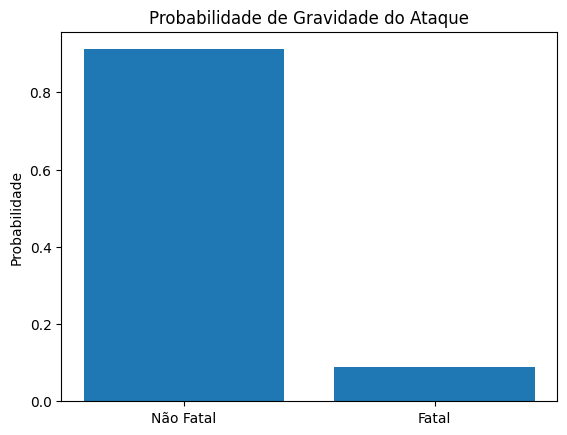

In [ ]:
import matplotlib.pyplot as plt

# Dados para o gráfico de barras
labels = ['Não Fatal', 'Fatal']
values = [prob_not_fatal, prob_fatal]

# Criando o gráfico
plt.bar(labels, values)
plt.title('Probabilidade de Gravidade do Ataque')
plt.ylabel('Probabilidade')
plt.show()


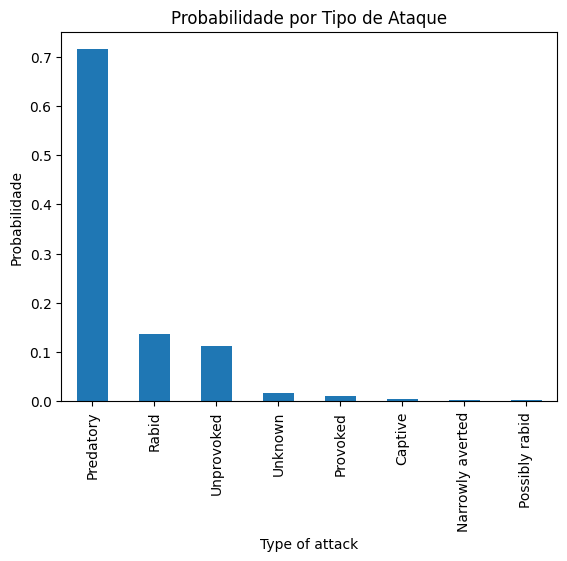

In [ ]:
# Criando um gráfico de barras para o tipo de ataque
type_of_attack_probs.plot(kind='bar', title='Probabilidade por Tipo de Ataque')
plt.ylabel('Probabilidade')
plt.show()


**Função Repartição (Função Cumulativa)**

Gravidade_Ataque
0    0.911255
1    1.000000
Name: proportion, dtype: float64


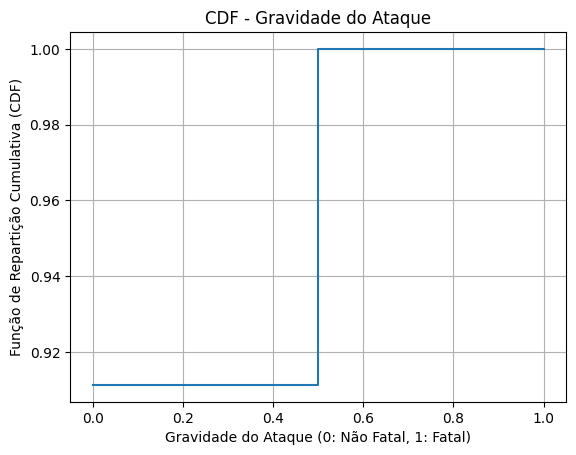

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Criando a variável aleatória para gravidade do ataque (1: Fatal, 0: Não Fatal)
wolf['Gravidade_Ataque'] = wolf['Notes'].apply(lambda x: 1 if 'fatal' in str(x).lower() else 0)

# Calculando a CDF para a variável Gravidade do Ataque
cdf_gravidade = np.cumsum(wolf['Gravidade_Ataque'].value_counts(normalize=True).sort_index())

# Exibindo os valores da CDF
print(cdf_gravidade)

# Plotando a CDF
plt.step([0, 1], cdf_gravidade, where='mid', label="CDF Gravidade do Ataque")
plt.xlabel('Gravidade do Ataque (0: Não Fatal, 1: Fatal)')
plt.ylabel('Função de Repartição Cumulativa (CDF)')
plt.title('CDF - Gravidade do Ataque')
plt.grid(True)
plt.show()


Type of attack
Captive             0.004566
Narrowly averted    0.006849
Possibly rabid      0.009132
Predatory           0.723744
Provoked            0.735160
Rabid               0.872146
Unknown             0.888128
Unprovoked          1.000000
Name: proportion, dtype: float64


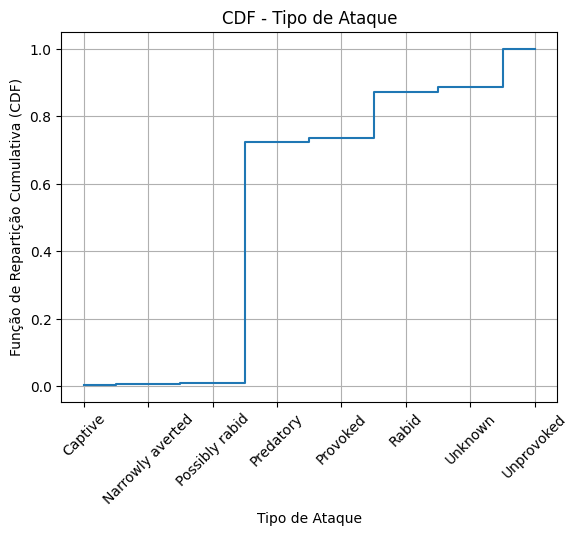

In [ ]:
# Contagem de tipos de ataque e cálculo da CDF
attack_type_counts = wolf['Type of attack'].value_counts(normalize=True).sort_index()
cdf_attack_type = np.cumsum(attack_type_counts)

# Exibindo os valores da CDF
print(cdf_attack_type)

# Plotando a CDF
attack_types = attack_type_counts.index
plt.step(attack_types, cdf_attack_type, where='mid', label="CDF Tipo de Ataque")
plt.xlabel('Tipo de Ataque')
plt.ylabel('Função de Repartição Cumulativa (CDF)')
plt.title('CDF - Tipo de Ataque')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Gráfico Simples**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Garantindo que os gráficos sejam exibidos no notebook
%matplotlib inline

# Carregando o dataset (substitua com o caminho correto do seu dataset)
wolf = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/global_wolves.csv')


<ipython-input-78-850a3329dfdf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Whe

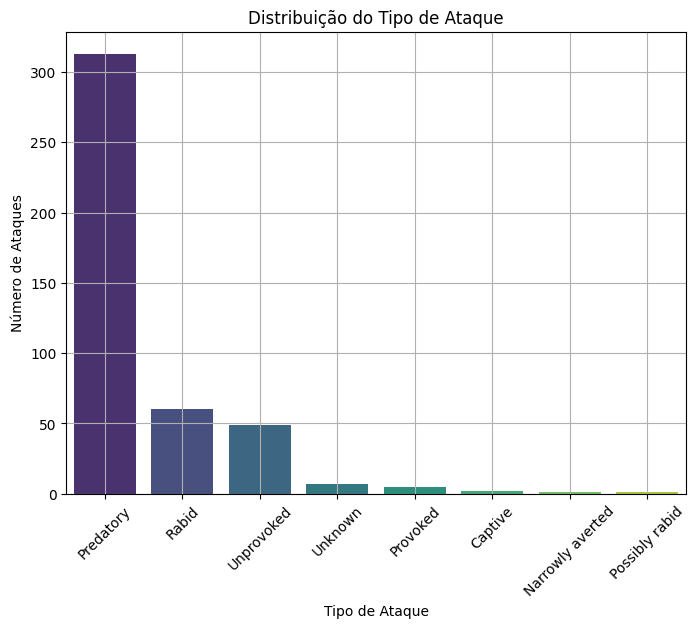

In [ ]:
# Contagem de cada tipo de ataque
attack_type_counts = wolf['Type of attack'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values, palette="viridis")
plt.title('Distribuição do Tipo de Ataque')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Número de Ataques')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


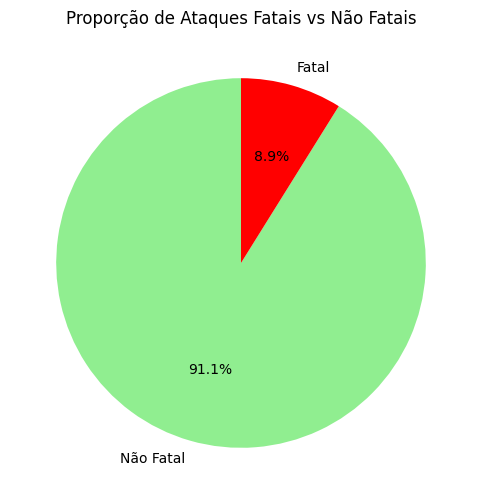

In [ ]:
# Criando a variável Gravidade do Ataque (Fatal = 1, Não Fatal = 0)
wolf['Gravidade_Ataque'] = wolf['Notes'].apply(lambda x: 1 if 'fatal' in str(x).lower() else 0)

# Contagem de ataques fatais e não fatais
fatal_counts = wolf['Gravidade_Ataque'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(fatal_counts, labels=['Não Fatal', 'Fatal'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'red'])
plt.title('Proporção de Ataques Fatais vs Não Fatais')
plt.show()


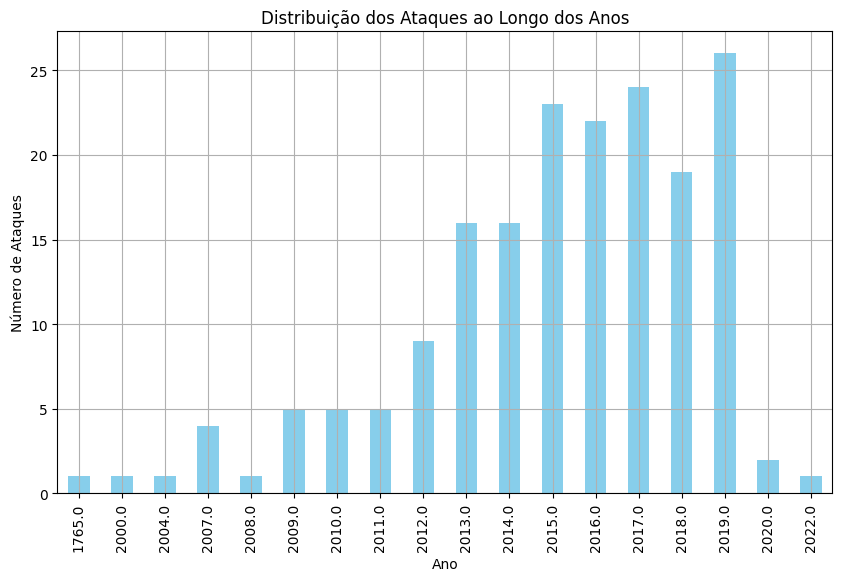

In [ ]:
# Convertendo a coluna de data para datetime (se necessário)
wolf['Date'] = pd.to_datetime(wolf['Date'], errors='coerce')

# Criando um histograma da distribuição dos ataques por ano
plt.figure(figsize=(10,6))
wolf['Date'].dt.year.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição dos Ataques ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Ataques')
plt.grid(True)
plt.show()


<ipython-input-81-4d26d469683b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_counts.index, y=urban_counts.values, palette="coolwarm")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


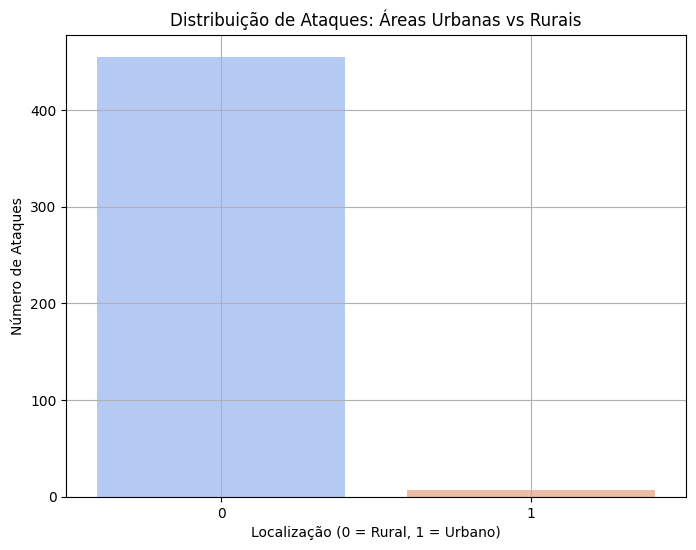

In [ ]:
# Criando uma variável para classificar ataques como urbanos ou rurais
wolf['Urbano'] = wolf['Location'].apply(lambda x: 1 if 'City' in str(x) or 'Urban' in str(x) else 0)

# Contagem de ataques urbanos vs rurais
urban_counts = wolf['Urbano'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x=urban_counts.index, y=urban_counts.values, palette="coolwarm")
plt.title('Distribuição de Ataques: Áreas Urbanas vs Rurais')
plt.xlabel('Localização (0 = Rural, 1 = Urbano)')
plt.ylabel('Número de Ataques')
plt.grid(True)
plt.show()


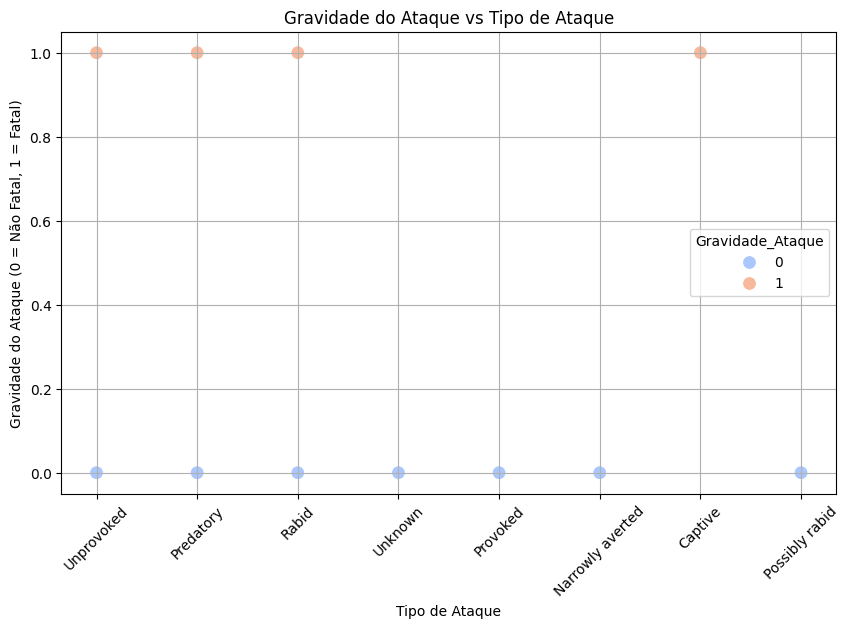

In [ ]:
# Criando um gráfico de dispersão para gravidade vs tipo de ataque
plt.figure(figsize=(10,6))
sns.scatterplot(x=wolf['Type of attack'], y=wolf['Gravidade_Ataque'], hue=wolf['Gravidade_Ataque'], palette="coolwarm", s=100)
plt.title('Gravidade do Ataque vs Tipo de Ataque')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Gravidade do Ataque (0 = Não Fatal, 1 = Fatal)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-83-bb84f7a52d63>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_attack_counts.index, y=country_attack_counts.values, palette="Blues_d")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarni

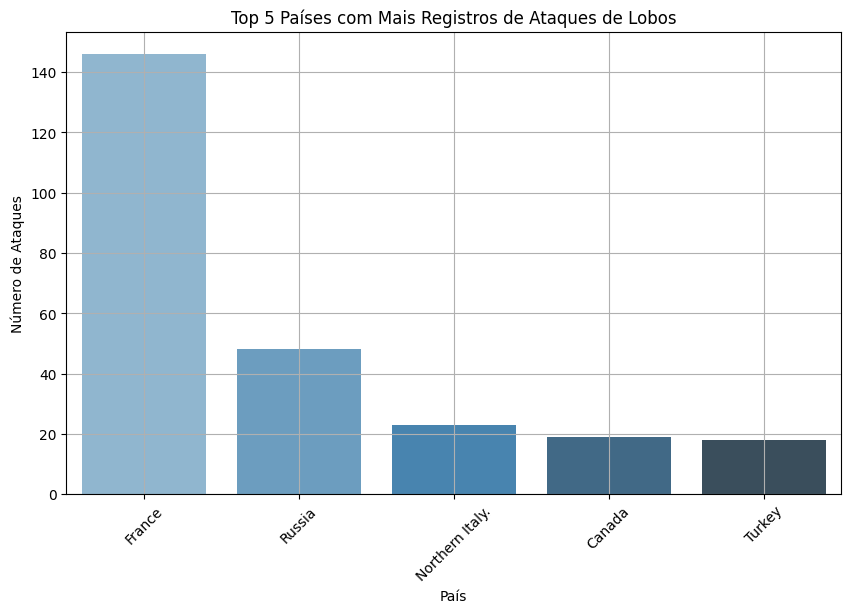

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraindo o país da coluna "Location" (supondo que o nome do país está contido nela)
# Aqui fazemos uma suposição de que o nome do país é o último termo na string da localização
wolf['Country'] = wolf['Location'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notna(x) else 'Unknown')

# Contando o número de ataques por país
country_attack_counts = wolf['Country'].value_counts().head(5)

# Plotando o gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=country_attack_counts.index, y=country_attack_counts.values, palette="Blues_d")
plt.title('Top 5 Países com Mais Registros de Ataques de Lobos')
plt.xlabel('País')
plt.ylabel('Número de Ataques')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


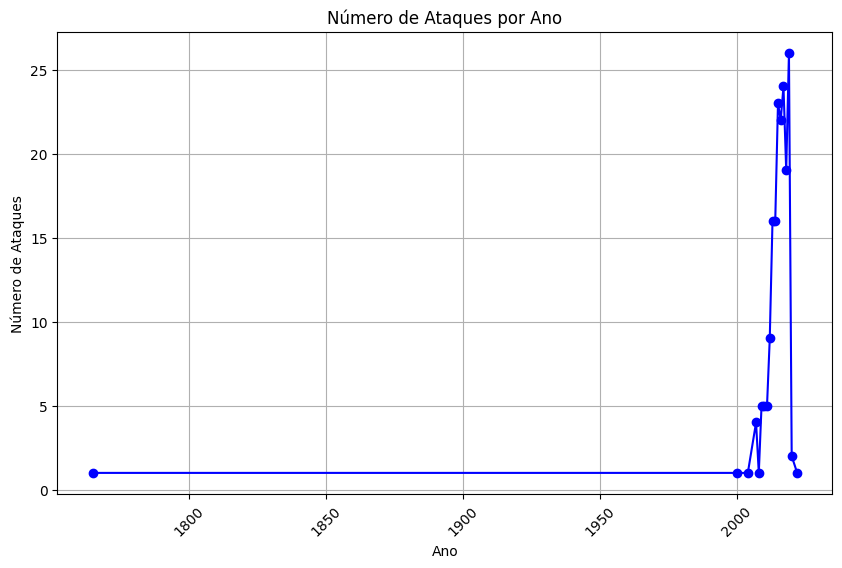

In [ ]:
import matplotlib.pyplot as plt

# Convertendo a coluna de data para o formato datetime (se ainda não foi feito)
wolf['Date'] = pd.to_datetime(wolf['Date'], errors='coerce')

# Extraindo o ano da coluna "Date"
wolf['Year'] = wolf['Date'].dt.year

# Contando o número de ataques por ano
attacks_per_year = wolf['Year'].value_counts().sort_index()

# Criando o gráfico de linha
plt.figure(figsize=(10,6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Número de Ataques por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ataques')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


**Variância e Desvio Padrão**

In [ ]:
# Variável Gravidade do Ataque (1: Fatal, 0: Não Fatal)
wolf['Gravidade_Ataque'] = wolf['Notes'].apply(lambda x: 1 if 'fatal' in str(x).lower() else 0)

# Variável para o Tipo de Ataque (convertendo categorias para números)
wolf['Tipo_Ataque_Numerico'] = wolf['Type of attack'].astype('category').cat.codes

# Variável para Localização (1: Urbano, 0: Rural)
wolf['Urbano'] = wolf['Location'].apply(lambda x: 1 if 'City' in str(x) or 'Urban' in str(x) else 0)

# Extraindo o ano da coluna 'Date' (se disponível)
wolf['Ano_Ataque'] = pd.to_datetime(wolf['Date'], errors='coerce').dt.year

# Número de Vítimas (supondo que a variável 'Victims' contém essa informação)
wolf['Num_Vitimas'] = wolf['Victims'].apply(lambda x: len(str(x).split('and')) if pd.notna(x) else 1)


In [ ]:
# Calculando a variância e o desvio padrão para 5 variáveis diferentes

variaveis = ['Gravidade_Ataque', 'Tipo_Ataque_Numerico', 'Urbano', 'Ano_Ataque', 'Num_Vitimas']

for var in variaveis:
    variancia = np.var(wolf[var].dropna())  # Variância
    desvio_padrao = np.std(wolf[var].dropna())  # Desvio padrão
    print(f"Variância de {var}: {variancia:.4f}")
    print(f"Desvio padrão de {var}: {desvio_padrao:.4f}\n")


Variância de Gravidade_Ataque: 0.0809
Desvio padrão de Gravidade_Ataque: 0.2844

Variância de Tipo_Ataque_Numerico: 2.9814
Desvio padrão de Tipo_Ataque_Numerico: 1.7267

Variância de Urbano: 0.0149
Desvio padrão de Urbano: 0.1222

Variância de Ano_Ataque: 354.9218
Desvio padrão de Ano_Ataque: 18.8394

Variância de Num_Vitimas: 0.0574
Desvio padrão de Num_Vitimas: 0.2397



**Covariância**

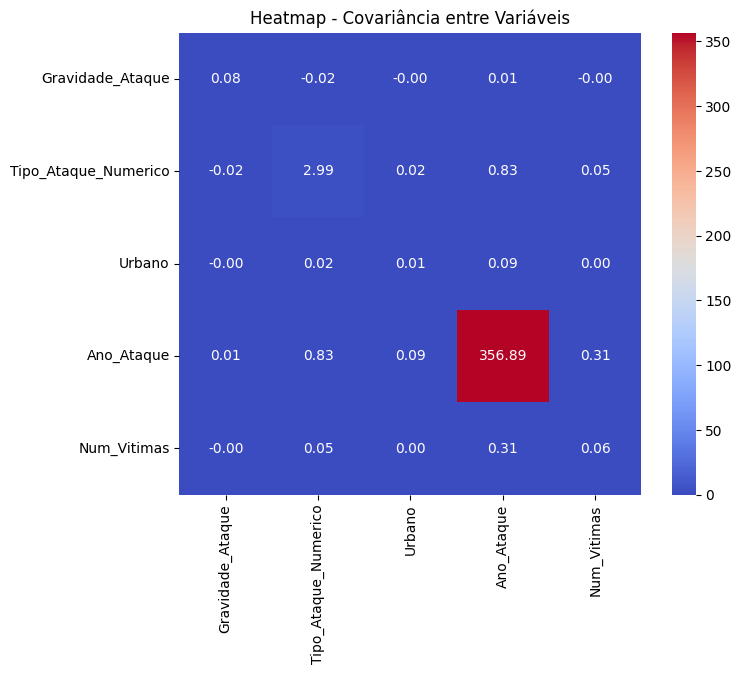

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo as variáveis
covariaveis = ['Gravidade_Ataque', 'Tipo_Ataque_Numerico', 'Urbano', 'Ano_Ataque', 'Num_Vitimas']

# Calculando a matriz de covariância
cov_matrix = wolf[covariaveis].cov()

# Criando o heatmap para a covariância
plt.figure(figsize=(8,6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap - Covariância entre Variáveis')
plt.show()


**Correlação**

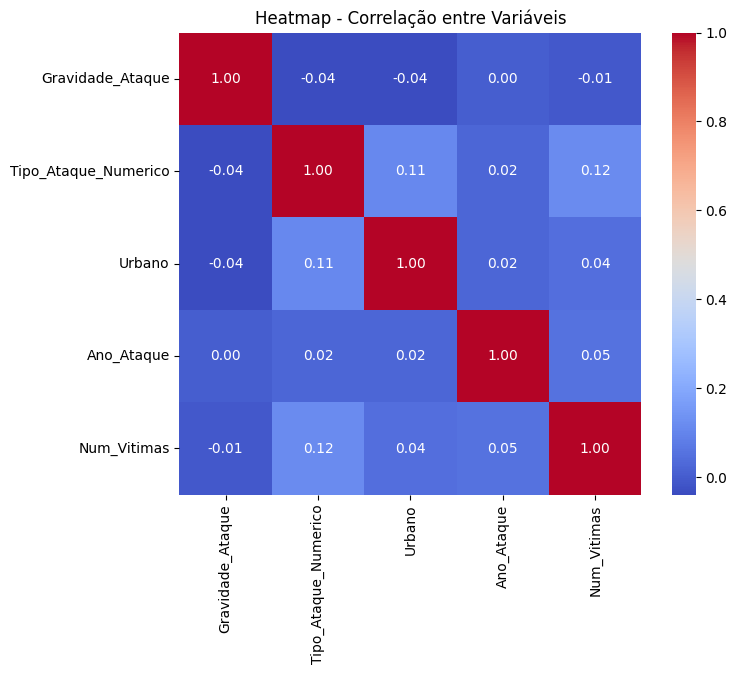

In [ ]:
# Calculando a matriz de correlação
corr_matrix = wolf[covariaveis].corr()

# Criando o heatmap para a correlação
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap - Correlação entre Variáveis')
plt.show()
